# GeoPandas

[GeoPandas](http://geopandas.org/) es un proyecto de software libre que extiende los tipos de datos de [Pandas](http://pandas.pydata.org/) para incorporar objetos geométricos (puntos, líneas, polígonos, etc). GeoPandas se apoya en las bibliotecas [Shapely](https://pypi.org/project/Shapely/) para realizar las operaciones geométricas, [Fiona](https://github.com/Toblerity/Fiona) para acceder a los datos (ej. en archivos) y [Descartes](https://bitbucket.org/sgillies/descartes/src/default/) y [Matplotlib](https://matplotlib.org/) para graficación.

El objetivo de GeoPandas es facilitar el trabajo con datos geoespaciales en el lenguaje Python, lo que se logra a través de la implementación de estructuras que permiten manejar simultáneamente grandes cantidades de datos. Las dos estructuras principales de GeoPandas son:

- [GeoSeries](http://geopandas.org/data_structures.html#geoseries): es un vector en el que cada elemento es un conjunto de una o varias geometrías correspondientes a una observación. Por ejemplo, el polígono (o multipolígono) que representa una provincia.
- [GeoDataFrame](http://geopandas.org/data_structures.html#geodataframe): es una estructura tabular (i.e. con filas y columnas) de datos geométricos y no geométricos (ej. textos, números). El conjunto de geometrías se implementa a través de GeoSeries.

Con estas estructuras, es posible realizar desde Python operaciones "masivas" de datos, las cuales de otra forma requerirían de una base de datos geoespacial (ej. [PostgreSQL/PostGIS](https://postgis.net/)).

## Instalación

Para instalar el paquete mediante **conda**, debe ejecutarse la siguiente instrucción desde la línea de comandos de Anaconda:

```
conda install geopandas
```

## Importación

In [1]:
%matplotlib inline

import pandas as pd
import geopandas

from shapely.geometry import Point, Polygon

# Cantidad máxima de registros que se despliegan en un GeoDataFrame
pd.options.display.max_rows = 10

Matplotlib is building the font cache; this may take a moment.


## Ejemplos

Para los siguientes ejemplos, se utilizará el _shapefile_ de países de [Natural Earth](https://www.naturalearthdata.com/), disponible en [http://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-admin-0-countries/](http://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-admin-0-countries/). El enlace anterior brinda acceso a un archivo ZIP que debe colocarse en el directorio de datos (/datos). Una vez hecho esto, se procede a almacenar los datos en un GeoDataFrame, a través de la función **read_file()**.

In [2]:
paises = geopandas.read_file("zip://./datos/ne_110m_admin_0_countries.zip")
# si se descomprimió el archivo, debe usarse el comando:
# paises = geopandas.read_file("datos/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

In [3]:
# paises es una variable del tipo GeoDataFrame
type(paises)

geopandas.geodataframe.GeoDataFrame

### Visualización de datos tabulares

Los datos de un GeoDataFrame pueden inspeccionarse con la función **head()**, la cual retorna los primeros registros de un GeoDataFrame. Nótese la columna con el tipo de datos geométricos.

In [4]:
paises.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,Fiji,FJI,...,피지,Fiji,Fidżi,Fiji,Фиджи,Fiji,Fiji,Fiji,斐濟,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,United Republic of Tanzania,TZA,...,탄자니아,Tanzania,Tanzania,Tanzânia,Танзания,Tanzania,Tanzanya,Tanzania,坦桑尼亚,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,Western Sahara,SAH,...,서사하라,Westelijke Sahara,Sahara Zachodnia,Saara Ocidental,Западная Сахара,Västsahara,Batı Sahra,Tây Sahara,西撒哈拉,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,Canada,CAN,...,캐나다,Canada,Kanada,Canadá,Канада,Kanada,Kanada,Canada,加拿大,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,United States of America,USA,...,미국,Verenigde Staten van Amerika,Stany Zjednoczone,Estados Unidos,Соединённые Штаты Америки,USA,Amerika Birleşik Devletleri,Hoa Kỳ,美国,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [5]:
# Despliegue de las geometrías
paises.geometry

0      MULTIPOLYGON (((180.00000 -16.06713, 180.00000...
1      POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...
2      POLYGON ((-8.66559 27.65643, -8.66512 27.58948...
3      MULTIPOLYGON (((-122.84000 49.00000, -122.9742...
4      MULTIPOLYGON (((-122.84000 49.00000, -120.0000...
                             ...                        
172    POLYGON ((18.82982 45.90887, 18.82984 45.90888...
173    POLYGON ((20.07070 42.58863, 19.80161 42.50009...
174    POLYGON ((20.59025 41.85541, 20.52295 42.21787...
175    POLYGON ((-61.68000 10.76000, -61.10500 10.890...
176    POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...
Name: geometry, Length: 177, dtype: geometry

In [6]:
# paises.geometry es una variable del tipo GeoSeries
type(paises.geometry)

geopandas.geoseries.GeoSeries

In [7]:
# Despliegue de la lista de columnas
paises.columns

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT',
       'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG',
       'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN',
       'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT',
       'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13',
       'POP_EST', 'POP_RANK', 'GDP_MD_EST', 'POP_YEAR', 'LASTCENSUS',
       'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'WIKIPEDIA', 'FIPS_10_', 'ISO_A2',
       'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID',
       'WOE_ID_EH', 'WOE_NOTE', 'ADM0_A3_IS', 'ADM0_A3_US', 'ADM0_A3_UN',
       'ADM0_A3_WB', 'CONTINENT', 'REGION_UN', 'SUBREGION', 'REGION_WB',
       'NAME_LEN', 'LONG_LEN', 'ABBREV_LEN', 'TINY', 'HOMEPART', 'MIN_ZOOM',
       'MIN_LABEL', 'MAX_LABEL', 'NE_ID', 'WIKIDATAID', 'NAME_AR', 'NAME_BN',
       'NAME_DE', 'NAME_

In [8]:
# Despliegue de un subconjunto de columnas
paises[['NAME_ES','CONTINENT','ECONOMY']]

,NAME_ES,CONTINENT,ECONOMY
0,Fiyi,Oceania,6. Developing region
1,Tanzania,Africa,7. Least developed region
2,Sahara Occidental,Africa,7. Least developed region
3,Canadá,North America,1. Developed region: G7
4,Estados Unidos,North America,1. Developed region: G7
...,...,...,...
172,Serbia,Europe,6. Developing region
173,Montenegro,Europe,6. Developing region
174,Kosovo,Europe,6. Developing region
175,Trinidad y Tobago,North America,6. Developing region


**Funciones en columnas**

In [9]:
# Promedio
paises['POP_EST'].mean()

41712369.84180791

In [10]:
# Máximo
paises['POP_EST'].max()

1379302771

In [11]:
# Mínimo
paises['POP_EST'].min()

140

**Filtrado**

In [12]:
paises[paises['CONTINENT'] == 'Africa']

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,United Republic of Tanzania,TZA,...,탄자니아,Tanzania,Tanzania,Tanzânia,Танзания,Tanzania,Tanzanya,Tanzania,坦桑尼亚,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,Western Sahara,SAH,...,서사하라,Westelijke Sahara,Sahara Zachodnia,Saara Ocidental,Западная Сахара,Västsahara,Batı Sahra,Tây Sahara,西撒哈拉,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
11,Admin-0 country,1,2,Democratic Republic of the Congo,COD,0,2,Sovereign country,Democratic Republic of the Congo,COD,...,콩고 민주 공화국,Congo-Kinshasa,Demokratyczna Republika Konga,República Democrática do Congo,Демократическая Республика Конго,Kongo-Kinshasa,Demokratik Kongo Cumhuriyeti,Cộng hòa Dân chủ Congo,刚果民主共和国,"POLYGON ((29.34000 -4.49998, 29.51999 -5.41998..."
12,Admin-0 country,1,6,Somalia,SOM,0,2,Sovereign country,Somalia,SOM,...,소말리아,Somalië,Somalia,Somália,Сомали,Somalia,Somali,Somalia,索马里,"POLYGON ((41.58513 -1.68325, 40.99300 -0.85829..."
13,Admin-0 country,1,2,Kenya,KEN,0,2,Sovereign country,Kenya,KEN,...,케냐,Kenia,Kenia,Quénia,Кения,Kenya,Kenya,Kenya,肯尼亚,"POLYGON ((39.20222 -4.67677, 37.76690 -3.67712..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Admin-0 country,1,5,Djibouti,DJI,0,2,Sovereign country,Djibouti,DJI,...,지부티,Djibouti,Dżibuti,Djibouti,Джибути,Djibouti,Cibuti,Djibouti,吉布提,"POLYGON ((42.35156 12.54223, 42.77964 12.45542..."
167,Admin-0 country,1,5,Somaliland,SOL,0,2,Indeterminate,Somaliland,SOL,...,소말릴란드,Somaliland,Somaliland,Somalilândia,Сомалиленд,Somaliland,Somaliland,Somaliland,索马里兰,"POLYGON ((48.94820 11.41062, 48.94820 11.41062..."
168,Admin-0 country,1,3,Uganda,UGA,0,2,Sovereign country,Uganda,UGA,...,우간다,Oeganda,Uganda,Uganda,Уганда,Uganda,Uganda,Uganda,乌干达,"POLYGON ((33.90371 -0.95000, 31.86617 -1.02736..."
169,Admin-0 country,1,3,Rwanda,RWA,0,2,Sovereign country,Rwanda,RWA,...,르완다,Rwanda,Rwanda,Ruanda,Руанда,Rwanda,Ruanda,Rwanda,卢旺达,"POLYGON ((30.41910 -1.13466, 30.81613 -1.69891..."


In [13]:
paises[paises['POP_EST'] <= 100000]

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
20,Admin-0 country,1,5,United Kingdom,GB1,1,2,Dependency,Falkland Islands,FLK,...,포클랜드 제도,Falklandeilanden,Falklandy,Ilhas Malvinas,Фолклендские острова,Falklandsöarna,Falkland Adaları,Quần đảo Falkland,福克兰群岛,"POLYGON ((-61.20000 -51.85000, -60.00000 -51.2..."
22,Admin-0 country,1,3,Denmark,DN1,1,2,Country,Greenland,GRL,...,그린란드,Groenland,Grenlandia,Gronelândia,Гренландия,Grönland,Grönland,Greenland,格陵兰,"POLYGON ((-46.76379 82.62796, -43.40644 83.225..."
23,Admin-0 country,3,6,France,FR1,1,2,Dependency,French Southern and Antarctic Lands,ATF,...,프랑스령 남방 및 남극,Franse Zuidelijke en Antarctische Gebieden,Francuskie Terytoria Południowe i Antarktyczne,Terras Austrais e Antárticas Francesas,Французские Южные и Антарктические территории,Franska sydterritorierna,Fransız Güney ve Antarktika Toprakları,Vùng đất phía Nam và châu Nam Cực thuộc Pháp,法属南部领地,"POLYGON ((68.93500 -48.62500, 69.58000 -48.940..."
159,Admin-0 country,1,4,Antarctica,ATA,0,2,Indeterminate,Antarctica,ATA,...,남극,Antarctica,Antarktyda,Antártida,Антарктида,Antarktis,Antarktika,Châu Nam Cực,南极洲,"MULTIPOLYGON (((-48.66062 -78.04702, -48.15140..."


### Visualización de datos geoespaciales

La función [plot()](http://geopandas.org/reference.html#geopandas.GeoDataFrame.plot) proporciona una manera sencilla de visualizar los datos en un mapa.

<AxesSubplot:>

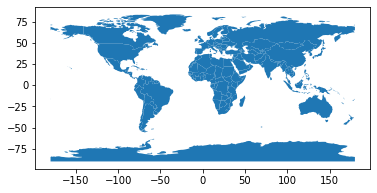

In [14]:
paises.plot()

<AxesSubplot:>

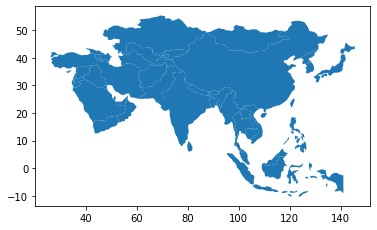

In [15]:
paises_asia = paises[paises['CONTINENT'] == 'Asia']
paises_asia.plot()

<AxesSubplot:>

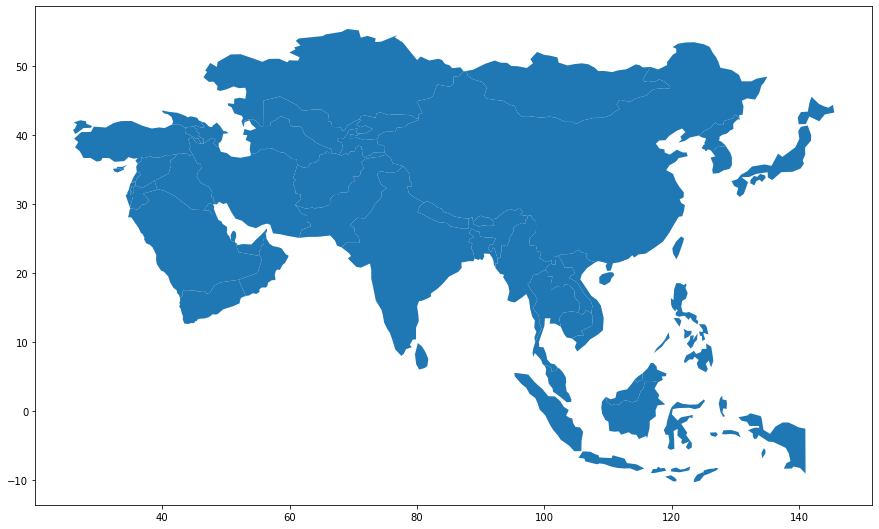

In [16]:
# Cambio de tamaño del mapa
paises_asia.plot(figsize=(15, 10))

**Colores**

<AxesSubplot:>

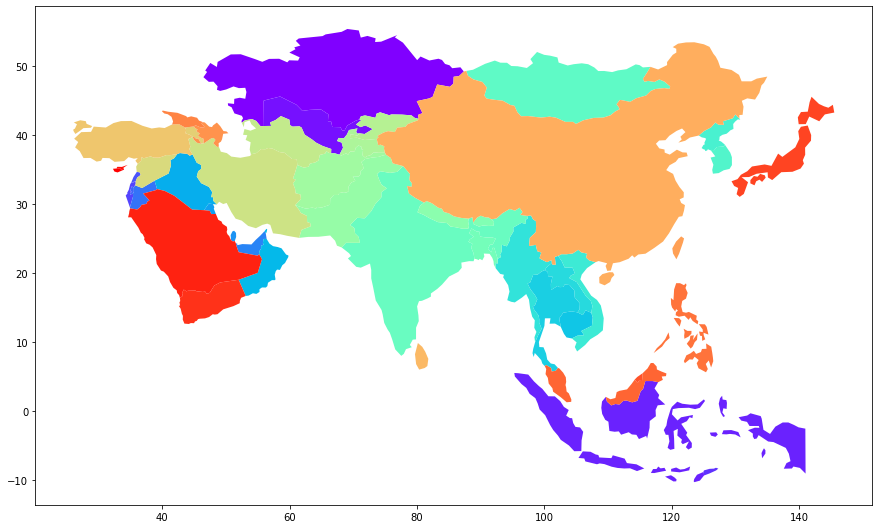

In [17]:
paises_asia.plot(figsize=(15, 10), cmap="rainbow")

<AxesSubplot:>

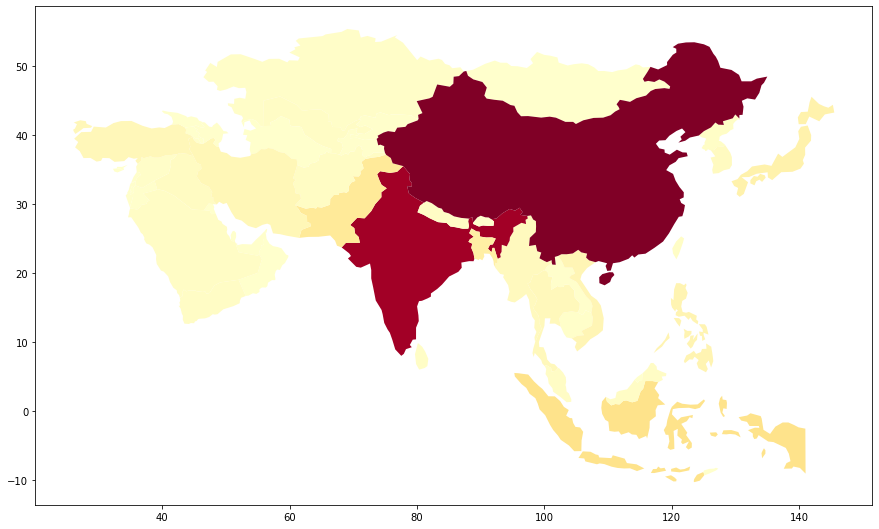

In [18]:
# Colores asignados con base en una columna
paises_asia.plot(figsize=(15, 10), cmap="YlOrRd", column="POP_EST")

Para más opciones de colores, puede consultarse [https://matplotlib.org/users/colormaps.html](https://matplotlib.org/users/colormaps.html).

#### Visualización de múltiples capas

Para los siguientes ejemplos, deben descargarse los siguientes _shapefiles_ comprimidos en formato ZIP:

- **Ciudades**: [http://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-populated-places/](http://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-populated-places/)
- **Ríos**: [http://www.naturalearthdata.com/downloads/50m-physical-vectors/50m-rivers-lake-centerlines/](http://www.naturalearthdata.com/downloads/50m-physical-vectors/50m-rivers-lake-centerlines/)

Ambas capas deben copiarse en el directorio de datos. Seguidamente, su contenido se almacena en dos GeoDataFrames:

In [20]:
ciudades = geopandas.read_file("zip://./datos/ne_110m_populated_places.zip")
rios = geopandas.read_file("zip://./datos/ne_50m_rivers_lake_centerlines.zip")

Se crea un subconjunto de datos para el continente africano:

In [21]:
paises_africa = paises[paises['CONTINENT'] == 'Africa']

[(-20.0, 60.0), (-40.0, 40.0)]

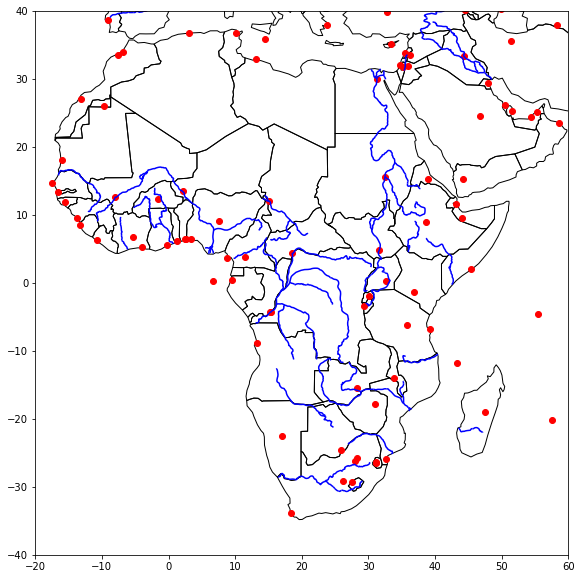

In [22]:
ax = paises.plot(edgecolor='black', facecolor='none', figsize=(15, 10))
rios.plot(ax=ax, color='blue')
ciudades.plot(ax=ax, color='red')
ax.set(xlim=(-20, 60), ylim=(-40, 40))

<div class="alert alert-success">
 <strong>Ejercicio</strong>:

Descargue del SNIT las capas de:
* Límite provincial [(http://www.snitcr.go.cr/servicios_ogc_lista_capas?k=bm9kbzo6MjY=&nombre=IGN%20Cartograf%C3%ADa%201:5mil)](http://www.snitcr.go.cr/servicios_ogc_lista_capas?k=bm9kbzo6MjY=&nombre=IGN%20Cartograf%C3%ADa%201:5mil)
* Aeródromos y red vial [(http://www.snitcr.go.cr/servicios_ogc_lista_capas?k=bm9kbzo6MjY=&nombre=IGN%20Cartograf%C3%ADa%201:5mil)](http://www.snitcr.go.cr/servicios_ogc_lista_capas?k=bm9kbzo6MjY=&nombre=IGN%20Cartograf%C3%ADa%201:5mil)

Despliegue las tres capas en un solo mapa.

</div>

**Datos geoespaciales en archivos de texto**

En estos casos, puede crearse un DataFrame convencional a partir del archivo de texto y un conjunto de geometrías a partir de las columnas correspondientes (ej. longitud, latitud). Posteriormente, se crea un GeoDataFrame combinando el DataFrame y las geometrías. A continuación, se presenta un ejemplo.

Para comenzar, descargue el archivo de datos de presencia en Costa Rica del género de aves [Trogon](https://en.wikipedia.org/wiki/Trogon_(genus)) de [http://api.gbif.org/v1/occurrence/download/request/0021444-190621201848488.zip](http://api.gbif.org/v1/occurrence/download/request/0021444-190621201848488.zip) y descomprímalo.

In [23]:
# Carga de los datos en un DataFrame
trogones_df = pd.read_csv("datos/0021444-190621201848488.csv", sep='\t')

C:\Users\mauguemu\anaconda3\envs\leccion-12a\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (10,34,35,36,38,40,41,43) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [24]:
trogones_df.head()

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,2294676901,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/29508598,Animalia,Chordata,Aves,Trogoniformes,Trogonidae,Trogon,Trogon caligatus,...,NaN,2019-07-25T14:08:19Z,CC_BY_NC_4_0,cukibapa,cukibapa,NaN,NaN,2019-07-29T07:55:15.725Z,STILLIMAGE,GEODETIC_DATUM_ASSUMED_WGS84;COORDINATE_ROUNDED
1,2294580122,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/29133368,Animalia,Chordata,Aves,Trogoniformes,Trogonidae,Trogon,Trogon aurantiiventris,...,NaN,2019-07-19T20:32:16Z,CC_BY_NC_4_0,lrussoutk,lrussoutk,NaN,NaN,2019-07-29T07:53:18.332Z,STILLIMAGE,GEODETIC_DATUM_ASSUMED_WGS84;COORDINATE_ROUNDED
2,2294477093,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/28748201,Animalia,Chordata,Aves,Trogoniformes,Trogonidae,Trogon,Trogon massena,...,NaN,2019-07-13T19:04:47Z,CC_BY_NC_4_0,kmherpkid,kmherpkid,NaN,NaN,2019-07-29T07:51:02.615Z,STILLIMAGE,GEODETIC_DATUM_ASSUMED_WGS84;COORDINATE_ROUNDED
3,2294476497,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/28748200,Animalia,Chordata,Aves,Trogoniformes,Trogonidae,Trogon,Trogon bairdii,...,NaN,2019-07-13T19:04:46Z,CC_BY_NC_4_0,kmherpkid,kmherpkid,NaN,NaN,2019-07-29T07:51:01.603Z,STILLIMAGE,GEODETIC_DATUM_ASSUMED_WGS84;COORDINATE_ROUNDED
4,2294476337,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/28748199,Animalia,Chordata,Aves,Trogoniformes,Trogonidae,Trogon,Trogon rufus,...,NaN,2019-07-13T19:04:46Z,CC_BY_NC_4_0,kmherpkid,kmherpkid,NaN,NaN,2019-07-29T07:51:01.814Z,STILLIMAGE,GEODETIC_DATUM_ASSUMED_WGS84;COORDINATE_ROUNDED


In [25]:
# Despliegue de un subconjunto de columnas
trogones_df[['species', 'decimalLongitude', 'decimalLatitude', 'eventDate']]

,species,decimalLongitude,decimalLatitude,eventDate
0,Trogon caligatus,-82.805258,9.675457,2014-01-01T13:21:00Z
1,Trogon aurantiiventris,-83.659362,8.639661,2015-12-28T12:06:00Z
2,Trogon massena,-83.590981,8.477301,2019-04-10T05:03:00Z
3,Trogon bairdii,-83.513941,8.413747,2019-04-10T04:59:00Z
4,Trogon rufus,-83.580167,8.479169,2019-04-09T11:53:00Z
...,...,...,...,...
66656,Trogon collaris,-84.170190,10.255370,2007-06-23T00:00:00Z
66657,Trogon aurantiiventris,-84.705780,10.431394,2007-06-22T00:00:00Z
66658,Trogon elegans,-85.619116,10.837858,2007-06-06T00:00:00Z
66659,Trogon aurantiiventris,-84.811053,10.311797,2006-06-15T00:00:00Z


In [26]:
# Se crea una lista de geometrías de puntos
puntos = [Point(xy) for xy in zip(trogones_df["decimalLongitude"], trogones_df["decimalLatitude"])]
puntos[:5]

In [27]:
# Se combina el DataFrame y las geometrías en un GeoDataFrame, junto con un sistema de coordenadas
trogones=geopandas.GeoDataFrame(trogones_df, crs={"init": "epsg:4326"}, geometry=puntos)

C:\Users\mauguemu\anaconda3\envs\leccion-12a\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [28]:
trogones.head()

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue,geometry
0,2294676901,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/29508598,Animalia,Chordata,Aves,Trogoniformes,Trogonidae,Trogon,Trogon caligatus,...,2019-07-25T14:08:19Z,CC_BY_NC_4_0,cukibapa,cukibapa,NaN,NaN,2019-07-29T07:55:15.725Z,STILLIMAGE,GEODETIC_DATUM_ASSUMED_WGS84;COORDINATE_ROUNDED,POINT (-82.80526 9.67546)
1,2294580122,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/29133368,Animalia,Chordata,Aves,Trogoniformes,Trogonidae,Trogon,Trogon aurantiiventris,...,2019-07-19T20:32:16Z,CC_BY_NC_4_0,lrussoutk,lrussoutk,NaN,NaN,2019-07-29T07:53:18.332Z,STILLIMAGE,GEODETIC_DATUM_ASSUMED_WGS84;COORDINATE_ROUNDED,POINT (-83.65936 8.63966)
2,2294477093,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/28748201,Animalia,Chordata,Aves,Trogoniformes,Trogonidae,Trogon,Trogon massena,...,2019-07-13T19:04:47Z,CC_BY_NC_4_0,kmherpkid,kmherpkid,NaN,NaN,2019-07-29T07:51:02.615Z,STILLIMAGE,GEODETIC_DATUM_ASSUMED_WGS84;COORDINATE_ROUNDED,POINT (-83.59098 8.47730)
3,2294476497,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/28748200,Animalia,Chordata,Aves,Trogoniformes,Trogonidae,Trogon,Trogon bairdii,...,2019-07-13T19:04:46Z,CC_BY_NC_4_0,kmherpkid,kmherpkid,NaN,NaN,2019-07-29T07:51:01.603Z,STILLIMAGE,GEODETIC_DATUM_ASSUMED_WGS84;COORDINATE_ROUNDED,POINT (-83.51394 8.41375)
4,2294476337,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/28748199,Animalia,Chordata,Aves,Trogoniformes,Trogonidae,Trogon,Trogon rufus,...,2019-07-13T19:04:46Z,CC_BY_NC_4_0,kmherpkid,kmherpkid,NaN,NaN,2019-07-29T07:51:01.814Z,STILLIMAGE,GEODETIC_DATUM_ASSUMED_WGS84;COORDINATE_ROUNDED,POINT (-83.58017 8.47917)


<AxesSubplot:>

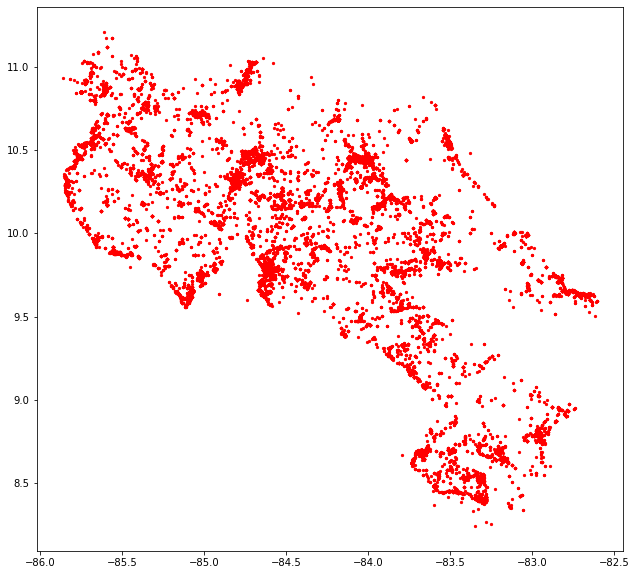

In [29]:
# Mapa de los registros de presencia de trogones
trogones.plot(figsize=(15, 10), color="red", markersize=5)

<div class="alert alert-success">
 <strong>Ejercicio</strong>:

Despliegue los registros de presencia de trogones sobre la capa de provincias del SNIT.

</div>

In [30]:
provincias = geopandas.read_file("datos/cr_provincias_wgs84_snit_ign_2019.shp")

ax = provincias.plot(edgecolor='black', facecolor='none', figsize=(15, 10))
trogones.plot(ax=ax, color='red', markersize=5)
ax.set(xlim=(-86.5, -82), ylim=(8, 11.25))

DriverError: datos/cr_provincias_wgs84_snit_ign_2019.shp: No such file or directory